In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import metrics
import env

In [3]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
df = pd.read_sql('SELECT * FROM logs', url)

In [7]:
df

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86


In [8]:
df['ip'].value_counts()

97.105.19.58       284579
97.105.19.61        61662
192.171.117.210      9515
71.150.217.33        6791
76.185.145.231       4754
                    ...  
172.58.109.140          1
99.203.213.59           1
99.203.212.173          1
173.239.198.246         1
72.181.124.244          1
Name: ip, Length: 5531, dtype: int64

In [10]:
df = df.set_index('date')
df

,time,path,user_id,cohort_id,ip
date,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...
2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33


In [16]:
ip = df.ip.value_counts(dropna=False)

In [25]:
# Step 1: Create a dataframe to view all ip value counts
ip_df = pd.DataFrame(ip).reset_index().\
rename(columns={'index':'ip', 'ip':'count'})

In [24]:
ip_df.head()

,ip,count
0,97.105.19.58,284579
1,97.105.19.61,61662
2,192.171.117.210,9515
3,71.150.217.33,6791
4,76.185.145.231,4754


In [28]:
# Create 2nd ip dataframe to hold probability of ip address being used 
ip_df2= pd.DataFrame((ip)/df.ip.count()).reset_index().\
rename(columns={'index':'ip', 'ip':'probability'})

In [27]:
ip_df2.head()

,ip,probability
0,97.105.19.58,0.316121
1,97.105.19.61,0.068496
2,192.171.117.210,0.010570
3,71.150.217.33,0.007544
4,76.185.145.231,0.005281


In [30]:
# Check
df.ip.count()/284579

3.1633500715091416

In [58]:
df.groupby('ip').size()/len(df)

ip
100.11.170.135     0.000127
100.19.73.35       0.000453
100.35.67.162      0.000012
103.137.12.164     0.000010
103.208.220.130    0.000001
                     ...   
99.97.210.12       0.000020
99.98.245.245      0.000002
99.98.32.165       0.000297
99.98.32.97        0.000051
99.98.36.168       0.000434
Length: 5531, dtype: float64

Text(0, 0.5, 'IP address')

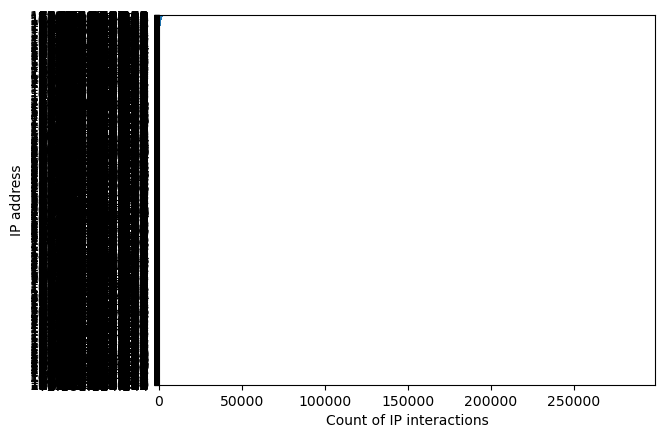

In [33]:
ip_df.set_index('ip')['count'].sort_values().plot.barh()
plt.xlabel('Count of IP interactions')
plt.ylabel('IP address')

Text(0, 0.5, 'IP address')

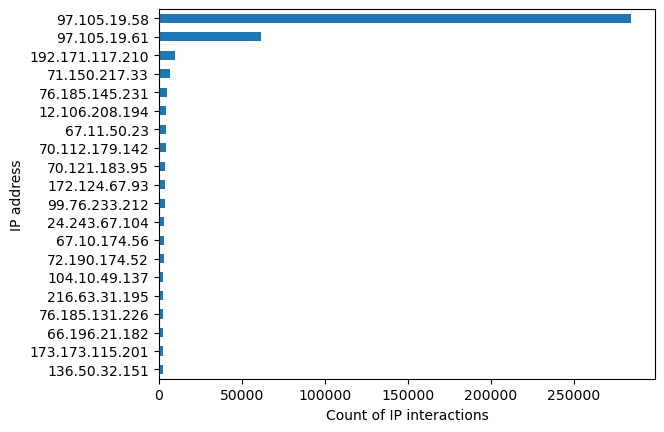

In [57]:
# Well that's not at all helpful lol. I'll look at 20 ip addresses instead
ip_df.set_index('ip')['count'].sort_values().tail(20).plot.barh()
plt.xlabel('Count of IP interactions')
plt.ylabel('IP address')

In [11]:
df.cohort_id.value_counts()

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

**Question 1.** 

Which lesson appears to attract the most traffic consistently across cohorts (per program)?

Answer: javascript-i

In [40]:
df.path.value_counts().head(20)

/                                                                            50313
search/search_index.json                                                     19519
javascript-i                                                                 18983
toc                                                                          18297
java-iii                                                                     13733
html-css                                                                     13635
java-ii                                                                      12685
spring                                                                       12524
jquery                                                                       11525
mysql                                                                        11033
java-i                                                                       10865
javascript-ii                                                                10730
appe

In [54]:
df.groupby(['ip', 'path']).size()/len(df)

ip              path                                       
100.11.170.135  /                                              0.000011
                examples/javascript/ajax-store.html            0.000001
                examples/javascript/blog.json                  0.000002
                examples/javascript/inventory.json             0.000001
                javascript-i/bom-and-dom/dom                   0.000002
                                                                 ...   
99.98.36.168    spring/fundamentals/security/authentication    0.000001
                spring/fundamentals/services                   0.000001
                spring/fundamentals/views                      0.000001
                spring/setup                                   0.000001
                toc                                            0.000011
Length: 120178, dtype: float64

In [50]:
df.sort_values(by=['ip','path'], ascending=False)

,time,path,user_id,cohort_id,ip
date,,,,,
2018-11-05,20:40:50,toc,310,27.0,99.98.36.168
2018-11-08,21:04:52,toc,310,27.0,99.98.36.168
2018-11-10,07:31:41,toc,310,27.0,99.98.36.168
2018-11-10,14:58:35,toc,310,27.0,99.98.36.168
2018-11-17,08:16:22,toc,310,27.0,99.98.36.168
...,...,...,...,...,...
2020-07-24,13:43:42,/,658,58.0,100.11.170.135
2020-07-24,14:19:43,/,658,58.0,100.11.170.135
2020-07-27,09:09:05,/,658,58.0,100.11.170.135


**Question 2**

Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [ ]:
df.groupby(['cohort_id', 'path']).size().plot.barh()

In [70]:
df.sort_index().head()

,time,path,user_id,cohort_id,ip
date,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [76]:
df.cohort_id.value_counts().head()

28.0    84031
33.0    40730
29.0    38096
62.0    37109
53.0    36902
Name: cohort_id, dtype: int64

**Question 3** 

Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [83]:
######## Finding users with low interaction with curriculum
df.user_id.value_counts().tail()

66     1
163    1
918    1
212    1
952    1
Name: user_id, dtype: int64

In [110]:
df.groupby('user_id').path.count().sort_values(ascending=True).head(10)

user_id
652    1
212    1
879    1
163    1
952    1
165    1
649    1
592    1
593    1
619    1
Name: path, dtype: int64

In [116]:
low = df.groupby('user_id').path.count().sort_values(ascending=True).head(10)

In [117]:
low

user_id
652    1
212    1
879    1
163    1
952    1
165    1
649    1
592    1
593    1
619    1
Name: path, dtype: int64

In [118]:
high = df.groupby('user_id').path.count().sort_values(ascending=False).head(10)

In [119]:
high

user_id
11     17913
64     16347
53     12329
314     7783
1       7404
495     6451
581     6434
428     5897
344     5460
248     5075
Name: path, dtype: int64

In [94]:
df[df.user_id==952].path.count()

1

In [107]:
df[df.user_id==538]

,time,path,user_id,cohort_id,ip
date,,,,,
2019-11-04,16:06:07,login,538,52.0,97.105.19.58
2019-11-04,16:06:15,/,538,52.0,97.105.19.58
2019-11-04,16:09:00,html-css,538,52.0,97.105.19.58
2019-11-05,08:38:29,toc,538,52.0,97.105.19.58
2019-11-05,08:38:33,html-css,538,52.0,97.105.19.58
...,...,...,...,...,...
2021-02-04,15:28:09,java-iii/mvc/servlets-with-jsps,538,52.0,108.196.159.214
2021-02-11,10:43:54,/,538,52.0,108.196.159.214
2021-02-11,10:44:02,spring,538,52.0,108.196.159.214


In [108]:
df[df.user_id==952]

,time,path,user_id,cohort_id,ip
date,,,,,
2021-04-08,16:29:45,/,952,17.0,70.125.158.82


In [106]:
df.groupby(['user_id','path']).count()

time  cohort_id   ip
user_id path                                                        
1       /                                        981        981  981
        00_                                        1          1    1
        00_index                                   5          5    5
        01_intro                                   5          5    5
        02_listing_files                           7          7    7
...                                              ...        ...  ...
981     html-css                                   7          7    7
        html-css/css-ii                            1          1    1
        html-css/css-ii/bootstrap-grid-system     20         20   20
        html-css/css-ii/bootstrap-introduction     6          6    6
        javascript-ii                              1          1    1

[116108 rows x 3 columns]

<AxesSubplot:ylabel='user_id,path'>

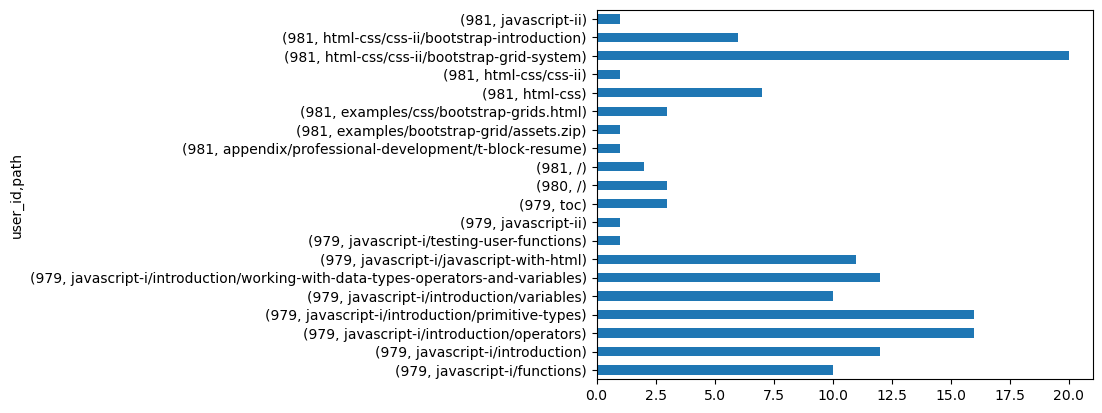

In [127]:
df.groupby(['user_id', 'path']).size().tail(20).plot.barh()

<AxesSubplot:ylabel='user_id,path'>

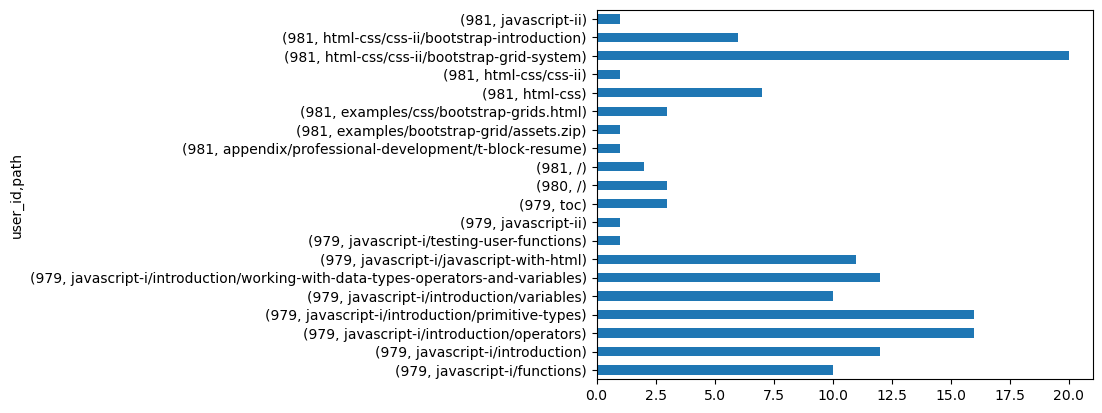

In [87]:
df.groupby(['user_id', 'path']).size().tail(20).plot.barh()